In [18]:
%matplotlib inline
import quandl
import seaborn as sns
import pandas as pd
token='QWe8iSbyAFzRuod2aroM'


import pylab
sns.set(font_scale=3)
pylab.rcParams['figure.figsize'] = (24, 18)

In [7]:
mkts={'SP 500':'CHRIS/CME_SP1',
      'US 10Y':'CHRIS/CME_TY1',
      'Crude Oil':'CHRIS/CME_CL1',
      'Eurostoxx 50':'CHRIS/EUREX_FESX1'
      }

In [15]:
data_index=pd.DataFrame()
for m in mkts.keys():
    try:
        data_index[m]=quandl.get(mkts[m],token=token).Last
    except:
        data_index[m]=quandl.get(mkts[m],token=token).Settle
data_pct=data_index.pct_change()     

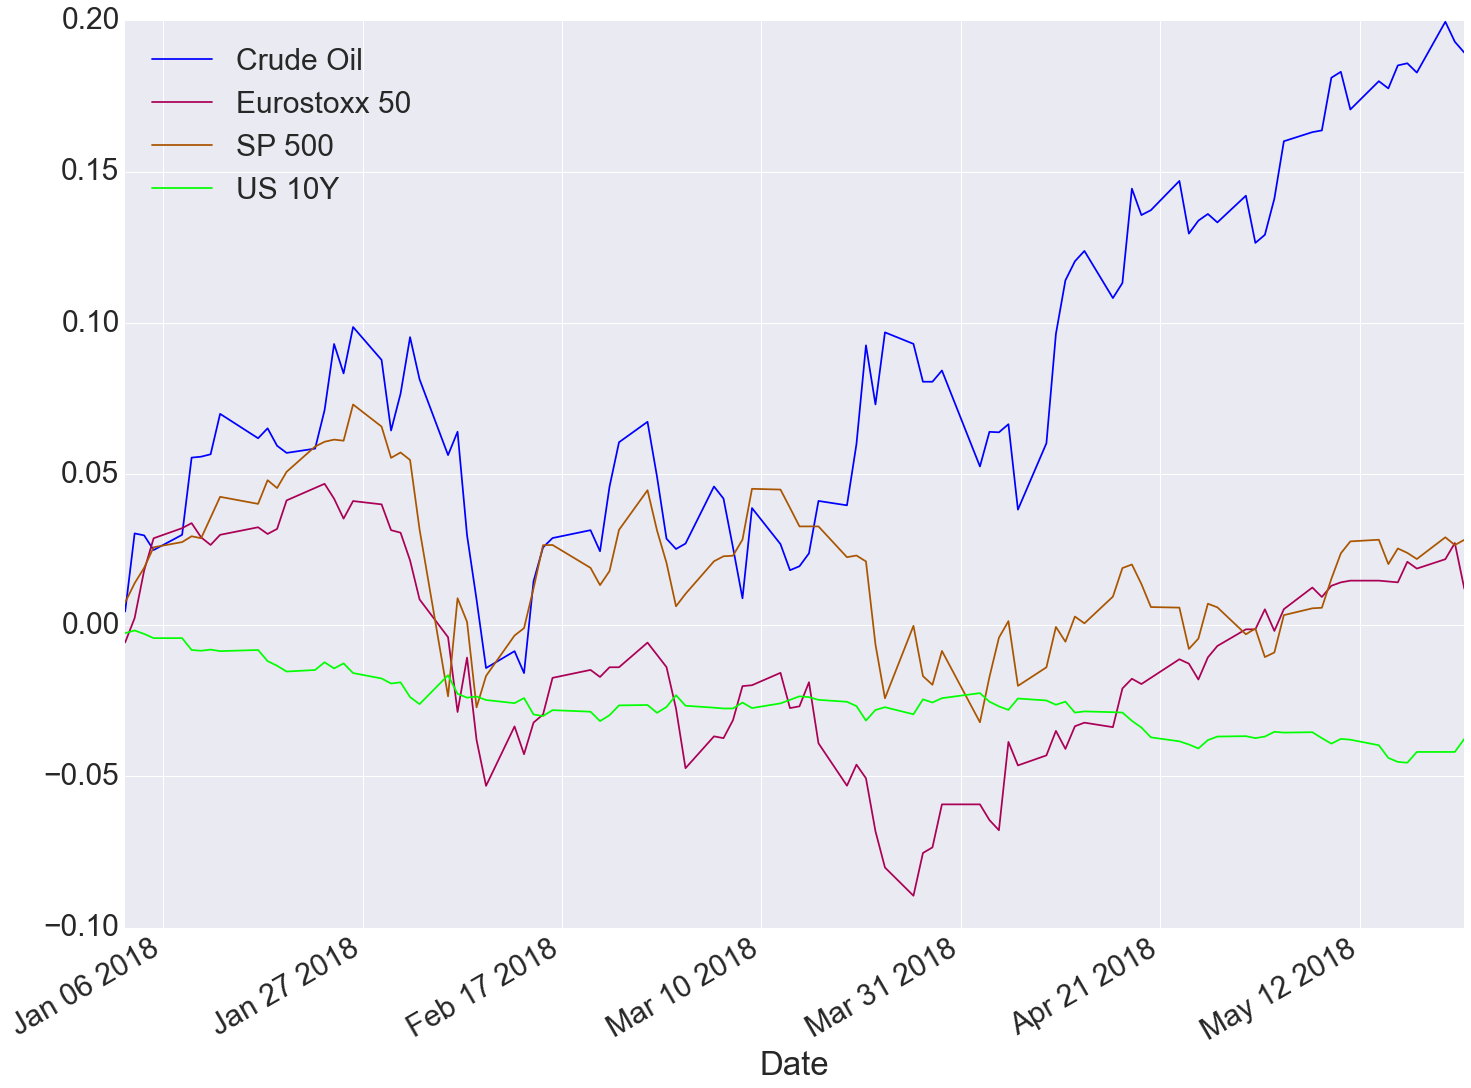

In [23]:
data_pct['2018':].cumsum().ffill().plot(colormap='brg')